In [155]:
 #widget has bugs with reloading plot
#%matplotlib inline

import numpy as np 
from scipy.sparse import diags # Used for banded matrices

import matplotlib
import matplotlib.pyplot as plt # Plotting
import seaborn as sns
plt.style.use('seaborn-dark')
plt.rcParams.update({'font.size':14})

from IPython.display import display, Markdown, Latex # used for printing Latex and Markdown output in code cells
from ipywidgets import interact, interactive, fixed, interact_manual, FloatSlider
import ipywidgets as widgets
import matplotlib.pyplot as plt, random
from ipywidgets import HBox, Label, Layout, Button, VBox

# imaginary unit
ii = 1j

In [156]:
# TODO write documentation

In [157]:
def Transfer_Matrix(x=0.01, n=6, x_2=0.):
    """ 
    # TODO implement next neighbor hopping
    """

    # Ensure probabilities are non-negative
    assert 2 * (x + x_2) <= 1, f"For consistency, twice the sum of x and x_2 has to be at most 1, you have 2 * (x + x_2) = {2 * (x + x_2):.3f}"

    # n=3 NN hopping for n=3 is equal to normal hopping
    if x_2 and n > 3:
        return np.eye(n) * (1 - 2*(x + x_2)) + Hopping_Matrix(n) * x + NN_Hopping_Matrix(n) * x_2
    else:
        return np.eye(n) * (1 - 2*x) + Hopping_Matrix(n) * x


def Hopping_Matrix(n = 6):
    """
    blub
    """

    ### Check if system is large enough, i.e. if n=>2
    assert n >= 2, "error n must be greater or equal to 2"

    diagonal_entries = [np.ones(n-1), np.ones(n-1)]
    H = diags(diagonal_entries, [-1, 1]).toarray()

    # take care of the values not on the lower and upper main diagonal
    H[[0, n-1], [n-1, 0]] = 1

    return H


def NN_Hopping_Matrix(n = 6):
    """
    write documentation
    """

    ### Check if system is large enough, i.e. if n=>3
    assert n >= 3, "error n must be greater or equal to 2"
    # due to symmetrie, 4x4 next neighbor hopping introduces errors if not handled with care
    if n == 4:
        diagonal_entries = [np.ones(n-2), np.ones(n-2)]
        return diags(diagonal_entries, [-2, 2,]).toarray()
    else: 
        diagonal_entries = [[1, 1], np.ones(n-2), np.ones(n-2), [1, 1]]
        return diags(diagonal_entries, [-n+2, -2, 2, n-2]).toarray()

In [158]:
#Test cwll
""" for n in np.arange(3, 20):
    print(f"n = {n}")
    for x_2 in [0, 0.01]:
        print(f"x_2 = {x_2}")
        print(f"H = \n {Hopping_Matrix(n=n)}")
        print(f"NN = \n {NN_Hopping_Matrix(n=n)}")
        print(f"T = \n{Transfer_Matrix(x=0.3, x_2 = x_2, n=n)}")
    print(f"\n") """

' for n in np.arange(3, 20):\n    print(f"n = {n}")\n    for x_2 in [0, 0.01]:\n        print(f"x_2 = {x_2}")\n        print(f"H = \n {Hopping_Matrix(n=n)}")\n        print(f"NN = \n {NN_Hopping_Matrix(n=n)}")\n        print(f"T = \n{Transfer_Matrix(x=0.3, x_2 = x_2, n=n)}")\n    print(f"\n") '

In [345]:
def Calc_Markov(state=np.array([1,0,0,0,0,0]), n_its=400, **kwargs):
    T = Transfer_Matrix(*kwargs.values()) #TODO make varibale sliders x=0.1, n=6, x_2=None)

    state = np.array(state)
    observations = [state]
    for _ in np.arange(n_its):
        state = T @ state
        observations.append(state)
    return np.array(observations)


Button_Markov = Button(
        layout=Layout(width = "5cm"),
        description="Click to save current figure",
        style = {'description_width': 'initial'}
        )

states_dict = {5:[[1,0,0,0,0], [0,1,0,0,0], [0,0,1,0,0], [0.5,0.3,0.2,0,0]],
               6:[[1,0,0,0,0,0], [0,1,0,0,0,0], [0,0,1,0,0,0], [0.5,0.3,0.2,0,0,0]]}

def Plot_Markov(state=np.array([1,0,0,0,0,0]), n_its=400, button=Button_Markov, **kwargs):
    Initial_State.options = states_dict[kwargs.get("n", 6)]

    observations = Calc_Markov(state, n_its, **kwargs)
    
    fig = plt.figure(figsize=(6,6))
    plt.title(f"Markov evolution of the initial state {state}")
    plt.xlabel(r"Number of iterations $n_{\mathrm{its}}$")
    plt.ylabel(r"Probability of finding particle at site $i$")
    plt.grid()

    for site in np.arange(len(state)):
        plt.plot(observations[:, site], label=f"Site {site+1}")
    legend = plt.legend(bbox_to_anchor=(1.05, 1), loc="upper left")
    
    ### save image if requested
    def on_button_clicked(_):
        fig.savefig("Figures/Markov.pdf", bbox_inches='tight')
    button.on_click(on_button_clicked)
    plt.show()

Initial_State = widgets.Dropdown(
    equals=np.array_equal, #otherwise "value" checks element wise
    options=[([1,0,0,0,0,0])],
    #    ('2', [0,1,0,0,0,0]),
    #    ("3", [0,0,1,0,0,0]),
    #    ("mix", [0.5,0.2,0.3,0,0,0])
    #    ],
    value=np.array([1,0,0,0,0,0]),#np.array([1,0,0,0,0,0]),
    description='Initial State:',
    style = {'description_width': 'initial'},
    disabled=False,
)


Iterations_Slider = widgets.IntSlider(
            min=1,
            max=400,
            step=1,
            value=50,
            layout=Layout(width = "10cm"),# height="80px"),#"auto"),
            description=r'Number of iterations $x$',
            style = {'description_width': 'initial'},
            continuous_update=False,
            )

x_Slider = widgets.FloatSlider(
            min=0,
            max=1,
            step=0.01,
            value=0.1,
            layout=Layout(width = "10cm"),# height="80px"),#"auto"),
            description=r'$x$',
            style = {'description_width': 'initial'},
            continuous_update=False
            )

x2_Slider = widgets.FloatSlider(
            min=0,
            max=1,
            step=0.01,
            value=0.,
            layout=Layout(width = "10cm"),# height="80px"),#"auto"),
            description=r'$x_2$',
            style = {'description_width': 'initial'},
            continuous_update=False
            )

n_Slider = widgets.IntSlider(
            min=2,
            max=10,
            step=1,
            value=6,
            layout=Layout(width = "10cm"),# height="80px"),#"auto"),
            description=r'$n$',
            style = {'description_width': 'initial'},
            continuous_update=False
            )


In [346]:
display(Button_Markov)
w = interactive(Plot_Markov,
        state=Initial_State,
        n_its=Iterations_Slider,
        button=fixed(Button_Markov),
        x=x_Slider,
        n=n_Slider,
        x2=x2_Slider);

display(w)

Button(description='Click to save current figure', layout=Layout(width='5cm'), style=ButtonStyle())

interactive(children=(Dropdown(description='Initial State:', options=([1, 0, 0, 0, 0, 0],), style=DescriptionS…

# Quantum Mechanical Time evolution

In [10]:
from scipy.linalg import expm 

In [11]:
def Time_Evolution_Operator(H=Hopping_Matrix(), t=0.1):
    '''
    TODO
    '''
    return expm(ii * t * H)

def Plot_QM_Evolution(state=np.array([1,0,0,0,0,0]), m_its=100):
    '''
    TODO
    '''
    observations = [state]
    U = Time_Evolution_Operator()

    for _ in np.arange(m_its):
        state = U @ state
        #print(np.linalg.norm(state)**2)
        observations.append(state)
    observations = np.array(observations)
    for site in np.arange(4):
        plt.plot(np.abs(observations[:, site])**2)


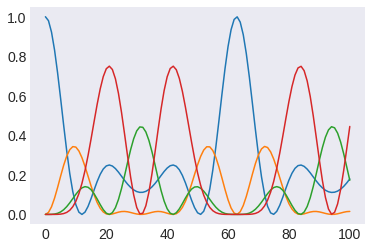

In [12]:
Plot_QM_Evolution()

In [336]:
np.arange(-1)

array([], dtype=int64)

In [211]:
button.on_click(on_button_clicked)

In [57]:
import numpy as np
from ipywidgets import interact, interactive,FloatSlider,IntSlider,Button
from IPython.display import display
import matplotlib.pylab as plt
%matplotlib inline
button = Button(description="Savefig")
display(button)



def plotfields(p,a):
    fig = plt.figure()
    X,Y=np.meshgrid(np.linspace(0,100,100),np.linspace(0,100,100))
    b1 = np.sin(p*X)*np.cos(a*Y)
    b2 = np.sin(a*X)*np.cos(p*Y)
    plt.imshow(b1,aspect='auto')
    plt.ylabel(r'$t$')
    plt.xlabel(r'$x$')
    plt.tight_layout()
    def on_button_clicked(b):
        print("test")
        fig.savefig("test_p{:.3s}_a{:.3s}.eps".format(str(int(100*p)),str(int(100*a))))
        fig.savefig("test_p{:.3s}_a{:.3s}.png".format(str(int(100*p)),str(int(100*a))))
    button.on_click(on_button_clicked)

p_w  = FloatSlider(min=0.01, max=1, step=0.01, value=0.01, continuous_update=False)
a_w  = FloatSlider(min=0.01, max=1, step=0.01, value=0.01, continuous_update=False)
interact(plotfields,p=p_w,a=a_w)


Button(description='Savefig', style=ButtonStyle())

interactive(children=(FloatSlider(value=0.01, continuous_update=False, description='p', max=1.0, min=0.01, ste…

<function __main__.plotfields(p, a)>

In [125]:
def h(p, q):
    print (p, q)

interact(h, p=5, q=["a", "b"]);

interactive(children=(IntSlider(value=5, description='p', max=15, min=-5), Dropdown(description='q', options=(…

In [367]:
c = widgets.Combobox(
    value='John',
    placeholder='Choose Someone',
    options=['Paul', 'John', 'George', 'Ringo'],
    description='Combobox:',
    ensure_option=True,
    disabled=False
)

def test(a):
    print(a)

interact(test, a=widgets.Combobox(
    value='John',
    placeholder='Choose Someone',
    options=['Paul', 'John', 'George', 'Ringo'],
    description='Combobox:',
    ensure_option=True,
    disabled=False
));

interactive(children=(Combobox(value='John', description='Combobox:', ensure_option=True, options=('Paul', 'Jo…

In [350]:
@interact(x=True, y=1.0)
def g(x, y):
    return (x, y)



interactive(children=(Checkbox(value=True, description='x'), FloatSlider(value=1.0, description='y', max=3.0, …

In [369]:


def f(x):
    return x

interact(f, x=widgets.Combobox(options=["Chicago", "New York", "Washington"]));

interactive(children=(Combobox(value='', description='x', options=('Chicago', 'New York', 'Washington')), Outp…